## Observations and Insights 

In [264]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head(None)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [372]:
# Checking the number of mice.
checkmice= combined_data["Mouse ID"].value_counts()
print(f'Number of Mice: {(len(checkmice))}')

Number of Mice: 249


In [373]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


combined_data.duplicated(['Mouse ID','Timepoint'])
combined_mice.head

<bound method NDFrame.head of 0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool>

In [359]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mice = combined_mice[combined_mice.duplicated('Mouse ID')]
duplicates_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [347]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = combined_data.drop_duplicates(subset=(['Mouse ID', 'Timepoint']),)
mice_data.head(None)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [348]:
# Checking the number of mice in the clean DataFrame.
mice_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [374]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = mice_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = mice_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_var = mice_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_std = mice_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = mice_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Standard Deviation": drug_std,
    "SEM": drug_sem,
})
drug_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

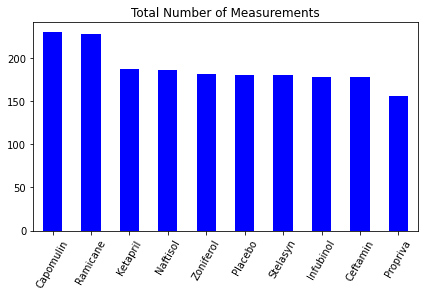

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [382]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugs_bar = mice_data["Drug Regimen"].value_counts()
drug_names = drugs_bar.index.tolist()

drugs_bar.plot(kind="bar", color="b", rot=60)
plt.tight_layout()
plt.title("Total Number of Measurements")
plt.show()
drugs_bar.head()

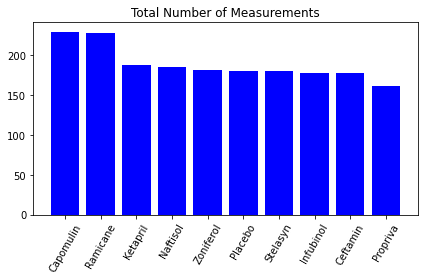

In [383]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#drug_names = 

x_axis = np.arange(len(drug_table))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, drug_count, color="b", align="center")
plt.xticks(tick_locations, drug_names, rotation=60)
plt.title("Total Number of Measurements")
plt.tight_layout()
plt.show()


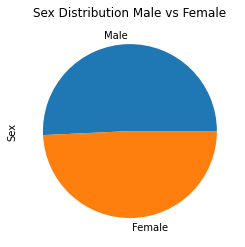

In [386]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = mice_data["Sex"].value_counts().plot.pie()
plt.title("Sex Distribution Male vs Female")
labels = ["Male", "Female"]

plt.show()

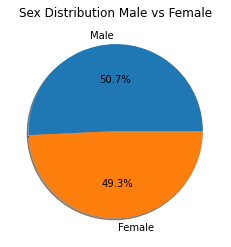

In [388]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex = mice_data["Sex"].value_counts()


plt.pie(mice_sex, labels=labels, autopct="%1.1f%%", shadow=True,)
plt.title("Sex Distribution Male vs Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [320]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#print(tumor_data)
tumor_drugs = mice_data.groupby(['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', ])
#tumor_drugs = mice_data.drop_duplicates(['Mouse ID'], keep='last')
#tumor_drugs = tumor_drugs.groupby(['Drug Regimen'])
#print(tumor_drugs)
# Start by getting the last (greatest) timepoint for each mouse
#last_tumor = mice_data.groupby(["Mouse ID"]).max()['Timepoint']
capomulin = mice_data.loc[mice_data['Capomulin']]
#ramicane = tumor_drugs.loc['Ramicane']
#infubinol = tumor_drugs.loc['Infubinol']
#ceftamin = tumor_drugs.loc['Ceftamin']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_drugs.head(50)

KeyError: 'Capomulin'

In [317]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_drugs['Tumor Volume (mm3)'].to_list()
print(treatments)
# Create empty list to fill with tumor vol data (for plotting)
tumor_voldata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

KeyError: 'Tumor Volume (mm3)'

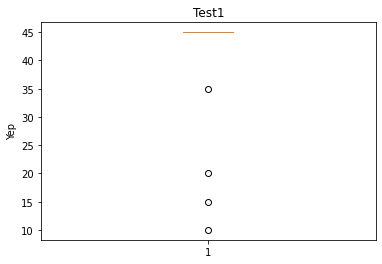

In [313]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Test1')
ax1.set_ylabel('Yep')
ax1.boxplot(capomulin)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
